## Environmental Risk Exposure in Tulare and Kern Counties and Low Birth Weight in Kern County

**By Melody Ng**

This week, I will be revising the maps on occupation data I prepared last week for and exploring certain health outcomes in Tulare County.

** The occupations map that I prepared last week was based on raw individual person counts. I will recreate the maps based on percentage counts (workers in a certain occupation as a percent of the total labor force within a census tract).

In [3]:
## Importing libraries
import pandas as pd
import geopandas as gpd

In [4]:
## Loading census data downloaded from Social Explorer
occ_tulare = pd.read_csv('R13285238_SL140.csv')

In [5]:
## Recoding FIPS/Geo ID columns as strings
occ_tulare = pd.read_csv('R13285238_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_COUNTY':str,
        'Geo_STATE':str
    }
)

In [6]:
occ_tulare[['Geo_FIPS','Geo_STATE','Geo_COUNTY']]

Geo_FIPS Geo_STATE Geo_COUNTY
0    06107000101        06        107
1    06107000102        06        107
2    06107000202        06        107
3    06107000203        06        107
4    06107000204        06        107
..           ...       ...        ...
98   06107004301        06        107
99   06107004302        06        107
100  06107004401        06        107
101  06107004402        06        107
102  06107004500        06        107

[103 rows x 3 columns]

In [7]:
## Confirming change in datatype
occ_tulare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 82 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           103 non-null    object 
 1   Geo_QName          103 non-null    object 
 2   Geo_FILEID         103 non-null    object 
 3   Geo_STUSAB         103 non-null    object 
 4   Geo_SUMLEV         103 non-null    int64  
 5   Geo_GEOCOMP        103 non-null    int64  
 6   Geo_LOGRECNO       103 non-null    int64  
 7   Geo_US             0 non-null      float64
 8   Geo_REGION         0 non-null      float64
 9   Geo_DIVISION       0 non-null      float64
 10  Geo_STATECE        0 non-null      float64
 11  Geo_STATE          103 non-null    object 
 12  Geo_COUNTY         103 non-null    object 
 13  Geo_COUSUB         0 non-null      float64
 14  Geo_PLACE          0 non-null      float64
 15  Geo_TRACT          103 non-null    int64  
 16  Geo_BLKGRP         0 non-n

In [8]:
## Cleaning: Trimming dataset by deleting columns with no values
occ_tulare.columns[occ_tulare.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [9]:
occ_tulare = occ_tulare.dropna(axis=1, how="all")

In [10]:
## Confirming dataset has been trimmed
occ_tulare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           103 non-null    object 
 1   Geo_QName          103 non-null    object 
 2   Geo_FILEID         103 non-null    object 
 3   Geo_STUSAB         103 non-null    object 
 4   Geo_SUMLEV         103 non-null    int64  
 5   Geo_GEOCOMP        103 non-null    int64  
 6   Geo_LOGRECNO       103 non-null    int64  
 7   Geo_STATE          103 non-null    object 
 8   Geo_COUNTY         103 non-null    object 
 9   Geo_TRACT          103 non-null    int64  
 10  Geo_GEOID          103 non-null    object 
 11  Geo_NAME           103 non-null    object 
 12  SE_B17008_001      103 non-null    int64  
 13  SE_B17008_002      103 non-null    int64  
 14  SE_B17008_003      103 non-null    int64  
 15  SE_B17008_004      103 non-null    int64  
 16  SE_B17008_005      103 non

In [11]:
occ_tulare.head()

Geo_FIPS                                     Geo_QName Geo_FILEID  \
0  06107000101  Census Tract 1.01, Tulare County, California      ACSSF   
1  06107000102  Census Tract 1.02, Tulare County, California      ACSSF   
2  06107000202  Census Tract 2.02, Tulare County, California      ACSSF   
3  06107000203  Census Tract 2.03, Tulare County, California      ACSSF   
4  06107000204  Census Tract 2.04, Tulare County, California      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO Geo_STATE Geo_COUNTY  \
0         ca         140            0         11564        06        107   
1         ca         140            0         11565        06        107   
2         ca         140            0         11566        06        107   
3         ca         140            0         11567        06        107   
4         ca         140            0         11568        06        107   

   Geo_TRACT  ... PCT_SE_B17008_005 PCT_SE_B17008_006  PCT_SE_B17008_007  \
0        101  ...              4.36              1.24               1.78   
1        102  ...              0.00              4.68              12.30   
2        202  ...              0.00              0.48               0.00   
3        203  ...              0.00              1.55               6.36   
4        204  ...              0.00              2.35               2.90   

   PCT_SE_B17008_008  PCT_SE_B17008_009  PCT_SE_B17008_010  PCT_SE_B17008_011  \
0               3.73               4.09              13.33               0.00   
1               0.00               8.71              11.86              11.97   
2               1.32               8.51               3.48              42.69   
3               0.63               3.10               9.06              21.33   
4               0.60              13.45              17.55              22.62   

   PCT_SE_B17008_012  PCT_SE_B17008_013  PCT_SE_B17008_014  
0               4.80               4.00               2.22  
1               6.53               5.44               8.71  
2               3.24               6.12              14.27  
3              21.62               2.35              11.93  
4               3.38              16.41              12.24  

[5 rows x 39 columns]

In [12]:
## Further trimming the dataset for essential columns (this time for the % variables)
occupations = ['Geo_FIPS','SE_B17008_001','PCT_SE_B17008_002','PCT_SE_B17008_003','PCT_SE_B17008_004','PCT_SE_B17008_005','PCT_SE_B17008_006','PCT_SE_B17008_007','PCT_SE_B17008_008','PCT_SE_B17008_009','PCT_SE_B17008_010','PCT_SE_B17008_011','PCT_SE_B17008_012','PCT_SE_B17008_013','PCT_SE_B17008_014']
occ_tulare2 = occ_tulare[occupations]

In [13]:
## Renaming the columns
occ_tulare2.columns = ['FIPS','EmployedPop','Management, Business, and Financial Ops','Professional and Related','Healthcare Support','Protective Service','Food Preparation and Serving Related','Building and Grounds Cleaning and Maintenance','Personal Care and Service','Sales and Related','Office and Administrative Support','Farming, Fishing, and Forestry','Construction, Extraction, and Maintenance','Production','Transportation and Material Moving']
occ_tulare2.head()

FIPS  EmployedPop  Management, Business, and Financial Ops  \
0  06107000101         1125                                    32.00   
1  06107000102          919                                    17.41   
2  06107000202          834                                     9.47   
3  06107000203         1744                                     7.63   
4  06107000204         1658                                     3.92   

   Professional and Related  Healthcare Support  Protective Service  \
0                     28.44                0.00                4.36   
1                     12.40                0.00                0.00   
2                      2.52                7.91                0.00   
3                      5.79                8.66                0.00   
4                      4.58                0.00                0.00   

   Food Preparation and Serving Related  \
0                                  1.24   
1                                  4.68   
2                                  0.48   
3                                  1.55   
4                                  2.35   

   Building and Grounds Cleaning and Maintenance  Personal Care and Service  \
0                                           1.78                       3.73   
1                                          12.30                       0.00   
2                                           0.00                       1.32   
3                                           6.36                       0.63   
4                                           2.90                       0.60   

   Sales and Related  Office and Administrative Support  \
0               4.09                              13.33   
1               8.71                              11.86   
2               8.51                               3.48   
3               3.10                               9.06   
4              13.45                              17.55   

   Farming, Fishing, and Forestry  Construction, Extraction, and Maintenance  \
0                            0.00                                       4.80   
1                           11.97                                       6.53   
2                           42.69                                       3.24   
3                           21.33                                      21.62   
4                           22.62                                       3.38   

   Production  Transportation and Material Moving  
0        4.00                                2.22  
1        5.44                                8.71  
2        6.12                               14.27  
3        2.35                               11.93  
4       16.41                               12.24

In [14]:
## checking datatype of the renamed occupation sector columns
occ_tulare2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   FIPS                                           103 non-null    object 
 1   EmployedPop                                    103 non-null    int64  
 2   Management, Business, and Financial Ops        103 non-null    float64
 3   Professional and Related                       103 non-null    float64
 4   Healthcare Support                             103 non-null    float64
 5   Protective Service                             103 non-null    float64
 6   Food Preparation and Serving Related           103 non-null    float64
 7   Building and Grounds Cleaning and Maintenance  103 non-null    float64
 8   Personal Care and Service                      103 non-null    float64
 9   Sales and Related                              103 non

In [15]:
## Average number of workers per census tract in Tulare County
print(occ_tulare2['EmployedPop'].mean())
print(occ_tulare2['EmployedPop'].median())

1818.1456310679612
1744.0


In [16]:
## Average % of 'Production' workers per census tract in Tulare County
print(occ_tulare2['Production'].mean())
print(occ_tulare2['Production'].median())

5.754757281553401
5.0


In [17]:
## Average % of 'Farming, Fishing, and Forestry' workers per census tract in Tulare County
print(occ_tulare2['Farming, Fishing, and Forestry'].mean())
print(occ_tulare2['Farming, Fishing, and Forestry'].median())

13.478640776699029
10.49


In [18]:
## Average % of 'Construction, Extraction, and Maintenance' workers per census tract in Tulare County
print(occ_tulare2['Construction, Extraction, and Maintenance'].mean())
print(occ_tulare2['Construction, Extraction, and Maintenance'].median())

7.54145631067961
7.0


In [19]:
## Average Population of 'Professional and Related' workers per census tract in Tulare County
print(occ_tulare2['Professional and Related'].mean())
print(occ_tulare2['Professional and Related'].median())

14.960776699029127
13.83


In [20]:
## Average Population of 'Transportation and Material Moving' workers per census tract in Tulare County
print(occ_tulare2['Transportation and Material Moving'].mean())
print(occ_tulare2['Transportation and Material Moving'].median())

10.00621359223301
9.32


On average, professional workers seem to make up a larger proportion of workers withn a given census tract in the county than other workers -- followed by agricultural and resource management workers, goods movement workers, and workers in the extraction industries.

## Remapping Occupations In Tulare County

In [21]:
## Mapping Select Occupation of Residents in Tulare County

## opening geojson disability census data from Census Reporter
tulare_tracts = gpd.read_file('acs2021_5yr_B99181_disability_tulare.geojson')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [22]:
tulare_tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             104 non-null    object  
 1   name              104 non-null    object  
 2   B99181001         104 non-null    float64 
 3   B99181001, Error  104 non-null    float64 
 4   B99181002         104 non-null    float64 
 5   B99181002, Error  104 non-null    float64 
 6   B99181003         104 non-null    float64 
 7   B99181003, Error  104 non-null    float64 
 8   geometry          104 non-null    geometry
dtypes: float64(6), geometry(1), object(2)
memory usage: 7.4+ KB


In [23]:
tulare_tracts.head()

geoid                           name  B99181001  \
0        05000US06107              Tulare County, CA   466519.0   
1  14000US06107000101  Census Tract 1.01, Tulare, CA     2535.0   
2  14000US06107000102  Census Tract 1.02, Tulare, CA     2417.0   
3  14000US06107000202  Census Tract 2.02, Tulare, CA     2579.0   
4  14000US06107000203  Census Tract 2.03, Tulare, CA     4835.0   

   B99181001, Error  B99181002  B99181002, Error  B99181003  B99181003, Error  \
0              -1.0    53287.0              -1.0   413232.0              -1.0   
1              -1.0      245.0              -1.0     2290.0              -1.0   
2              -1.0      318.0              -1.0     2099.0              -1.0   
3              -1.0      173.0              -1.0     2406.0              -1.0   
4              -1.0      390.0              -1.0     4445.0              -1.0   

                                            geometry  
0  MULTIPOLYGON (((-118.80244 35.79017, -118.8027...  
1  MULTIPOLYGON (((-119.07932 36.32554, -119.0787...  
2  MULTIPOLYGON (((-119.24651 36.51340, -119.2462...  
3  MULTIPOLYGON (((-119.32270 36.54527, -119.3218...  
4  MULTIPOLYGON (((-119.30507 36.54962, -119.3050...

In [24]:
## Creating Tulare FIPS variable from Census Reporter geojson

## Trimming disability dataset from Census Reporter
tularetracts = tulare_tracts[['geoid','geometry']].copy()
tularetracts

geoid                                           geometry
0          05000US06107  MULTIPOLYGON (((-118.80244 35.79017, -118.8027...
1    14000US06107000101  MULTIPOLYGON (((-119.07932 36.32554, -119.0787...
2    14000US06107000102  MULTIPOLYGON (((-119.24651 36.51340, -119.2462...
3    14000US06107000202  MULTIPOLYGON (((-119.32270 36.54527, -119.3218...
4    14000US06107000203  MULTIPOLYGON (((-119.30507 36.54962, -119.3050...
..                  ...                                                ...
99   14000US06107004301  MULTIPOLYGON (((-119.25041 35.89190, -119.2486...
100  14000US06107004302  MULTIPOLYGON (((-119.53806 35.79706, -119.5380...
101  14000US06107004401  MULTIPOLYGON (((-119.28591 35.88358, -119.2859...
102  14000US06107004402  MULTIPOLYGON (((-119.28593 35.87828, -119.2859...
103  14000US06107004500  MULTIPOLYGON (((-119.10783 35.89467, -119.1078...

[104 rows x 2 columns]

In [25]:
## Creating a 'FIPS' variable using the 'geoid' variable
tularetracts['FIPS'] = tularetracts['geoid']
tularetracts['FIPS'].head()

0          05000US06107
1    14000US06107000101
2    14000US06107000102
3    14000US06107000202
4    14000US06107000203
Name: FIPS, dtype: object

In [26]:
## Isolating rows 1-104 so I can create a 'FIPS' variable without row 0 (County)
## Then creating new 'FIPS' variable
tularetracts = tularetracts.loc[1:104].copy()
tularetracts

geoid                                           geometry  \
1    14000US06107000101  MULTIPOLYGON (((-119.07932 36.32554, -119.0787...   
2    14000US06107000102  MULTIPOLYGON (((-119.24651 36.51340, -119.2462...   
3    14000US06107000202  MULTIPOLYGON (((-119.32270 36.54527, -119.3218...   
4    14000US06107000203  MULTIPOLYGON (((-119.30507 36.54962, -119.3050...   
5    14000US06107000204  MULTIPOLYGON (((-119.30499 36.54494, -119.3050...   
..                  ...                                                ...   
99   14000US06107004301  MULTIPOLYGON (((-119.25041 35.89190, -119.2486...   
100  14000US06107004302  MULTIPOLYGON (((-119.53806 35.79706, -119.5380...   
101  14000US06107004401  MULTIPOLYGON (((-119.28591 35.88358, -119.2859...   
102  14000US06107004402  MULTIPOLYGON (((-119.28593 35.87828, -119.2859...   
103  14000US06107004500  MULTIPOLYGON (((-119.10783 35.89467, -119.1078...   

                   FIPS  
1    14000US06107000101  
2    14000US06107000102  
3    14000US06107000202  
4    14000US06107000203  
5    14000US06107000204  
..                  ...  
99   14000US06107004301  
100  14000US06107004302  
101  14000US06107004401  
102  14000US06107004402  
103  14000US06107004500  

[103 rows x 3 columns]

In [27]:
## Removing extra characters from new 'FIPS' 
tularetracts['FIPS'] = '0'+tularetracts['FIPS'].str.lstrip('14000US')
tularetracts['FIPS'].copy()

1      06107000101
2      06107000102
3      06107000202
4      06107000203
5      06107000204
          ...     
99     06107004301
100    06107004302
101    06107004401
102    06107004402
103    06107004500
Name: FIPS, Length: 103, dtype: object

In [28]:
tularetracts.head()

geoid                                           geometry  \
1  14000US06107000101  MULTIPOLYGON (((-119.07932 36.32554, -119.0787...   
2  14000US06107000102  MULTIPOLYGON (((-119.24651 36.51340, -119.2462...   
3  14000US06107000202  MULTIPOLYGON (((-119.32270 36.54527, -119.3218...   
4  14000US06107000203  MULTIPOLYGON (((-119.30507 36.54962, -119.3050...   
5  14000US06107000204  MULTIPOLYGON (((-119.30499 36.54494, -119.3050...   

          FIPS  
1  06107000101  
2  06107000102  
3  06107000202  
4  06107000203  
5  06107000204

In [29]:
## Merging Tulare County Census Tract shapefile with Occupation data for Tulare County
tulare_occ_tracts = tularetracts.merge(occ_tulare2,on="FIPS")
## Confirming that the data has been merged
tulare_occ_tracts.tail()

geoid                                           geometry  \
98   14000US06107004301  MULTIPOLYGON (((-119.25041 35.89190, -119.2486...   
99   14000US06107004302  MULTIPOLYGON (((-119.53806 35.79706, -119.5380...   
100  14000US06107004401  MULTIPOLYGON (((-119.28591 35.88358, -119.2859...   
101  14000US06107004402  MULTIPOLYGON (((-119.28593 35.87828, -119.2859...   
102  14000US06107004500  MULTIPOLYGON (((-119.10783 35.89467, -119.1078...   

            FIPS  EmployedPop  Management, Business, and Financial Ops  \
98   06107004301         1128                                     4.70   
99   06107004302          909                                     9.13   
100  06107004401         1850                                     4.54   
101  06107004402         1399                                     4.07   
102  06107004500         1733                                    13.27   

     Professional and Related  Healthcare Support  Protective Service  \
98                       9.04                0.71                0.00   
99                       3.52                2.42                1.10   
100                      2.76                6.97                2.22   
101                      5.00                3.43                2.14   
102                     10.33                5.08                1.38   

     Food Preparation and Serving Related  \
98                                   2.75   
99                                   2.86   
100                                  2.32   
101                                  4.36   
102                                  2.65   

     Building and Grounds Cleaning and Maintenance  Personal Care and Service  \
98                                            2.57                       1.60   
99                                            3.19                       1.43   
100                                           7.95                       0.00   
101                                           0.00                       1.72   
102                                           3.00                       5.94   

     Sales and Related  Office and Administrative Support  \
98                2.30                               2.13   
99                3.30                               3.96   
100               5.68                               6.76   
101              11.72                               9.36   
102               8.31                               9.29   

     Farming, Fishing, and Forestry  \
98                            54.43   
99                            47.41   
100                           40.81   
101                           42.96   
102                           16.56   

     Construction, Extraction, and Maintenance  Production  \
98                                        2.84        9.13   
99                                       11.33        4.07   
100                                      11.68        3.08   
101                                       1.79        6.86   
102                                       8.60        2.77   

     Transportation and Material Moving  
98                                 7.80  
99                                 6.27  
100                                5.24  
101                                6.58  
102                               12.81

In [30]:
tulare_occ_tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   geoid                                          103 non-null    object  
 1   geometry                                       103 non-null    geometry
 2   FIPS                                           103 non-null    object  
 3   EmployedPop                                    103 non-null    int64   
 4   Management, Business, and Financial Ops        103 non-null    float64 
 5   Professional and Related                       103 non-null    float64 
 6   Healthcare Support                             103 non-null    float64 
 7   Protective Service                             103 non-null    float64 
 8   Food Preparation and Serving Related           103 non-null    float64 
 9   Building and Grounds Cleaning and M

## Comparing Agricultural and Land Workers to Professional Workers as a Proportion of the Labor Force in Tulare County

What can the occupation distributions tell us about potential income distribution/and health outcomes in certain census tracts?

<AxesSubplot: >

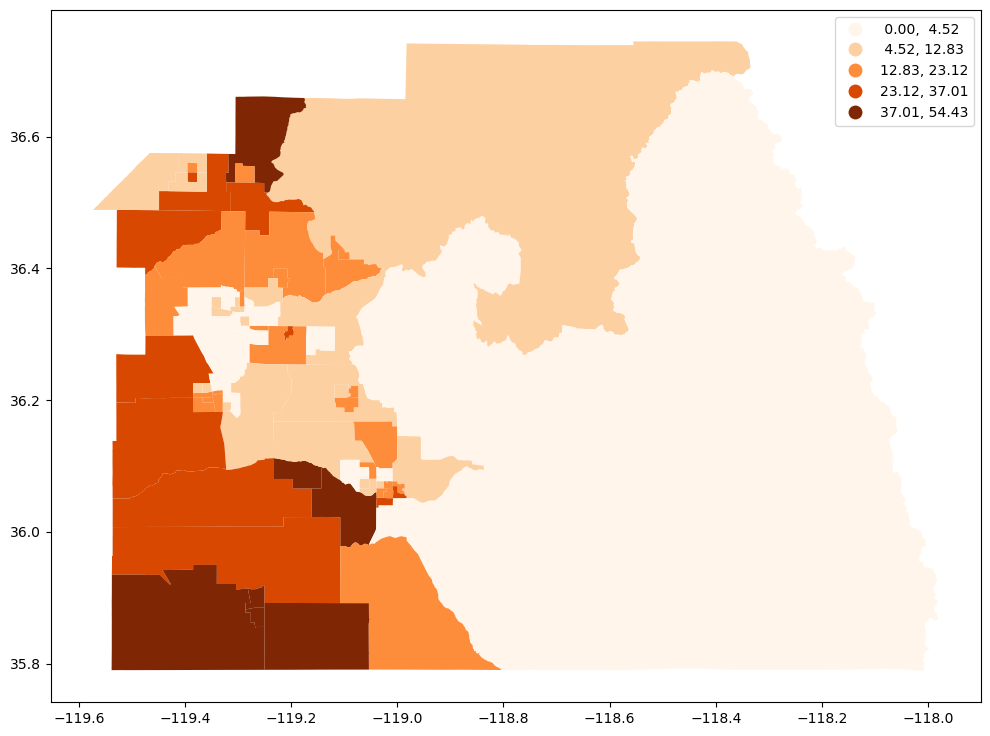

In [31]:
## Mapping occupation of residents who work in agriculture and public lands management in Tulare County
tulare_occ_tracts.plot(figsize=(12,10),
                 column='Farming, Fishing, and Forestry',
                 legend=True, 
                 cmap='Oranges',
                 scheme='NaturalBreaks')

In [32]:
## Creating 'Proportion of Labor Force' variable to make legend more intuitive

## Range % of 'Farming, Fishing, and Forestry' workers per census tract
print(tulare_occ_tracts['Farming, Fishing, and Forestry'].min())
print(tulare_occ_tracts['Farming, Fishing, and Forestry'].max())

0.0
54.43


In [33]:
## Identifying % values for 25% and 75% quartiles
tulare_occ_tracts['Farming, Fishing, and Forestry'].quantile([0.25,0.5,0.75])

0.25     2.435
0.50    10.490
0.75    19.885
Name: Farming, Fishing, and Forestry, dtype: float64

In [34]:
## Creating 'Proportion of Labor Force' variable for Ag and land workers
tulare_occ_tracts['AgLand Labor Prop'] = ''

In [35]:
tulare_occ_tracts['AgLand Labor Prop'] = '3 - High: More than 20%'
tulare_occ_tracts.loc[tulare_occ_tracts['Farming, Fishing, and Forestry'] < 20, 'AgLand Labor Prop'] = '2 - Average: 4% to 20%'
tulare_occ_tracts.loc[tulare_occ_tracts['Farming, Fishing, and Forestry'] < 4, 'AgLand Labor Prop'] = '1 - Low: Less than 4%'
tulare_occ_tracts['AgLand Labor Prop'].sample(5)

38     2 - Average: 4% to 20%
43      1 - Low: Less than 4%
88     2 - Average: 4% to 20%
65     2 - Average: 4% to 20%
92    3 - High: More than 20%
Name: AgLand Labor Prop, dtype: object

<AxesSubplot: >

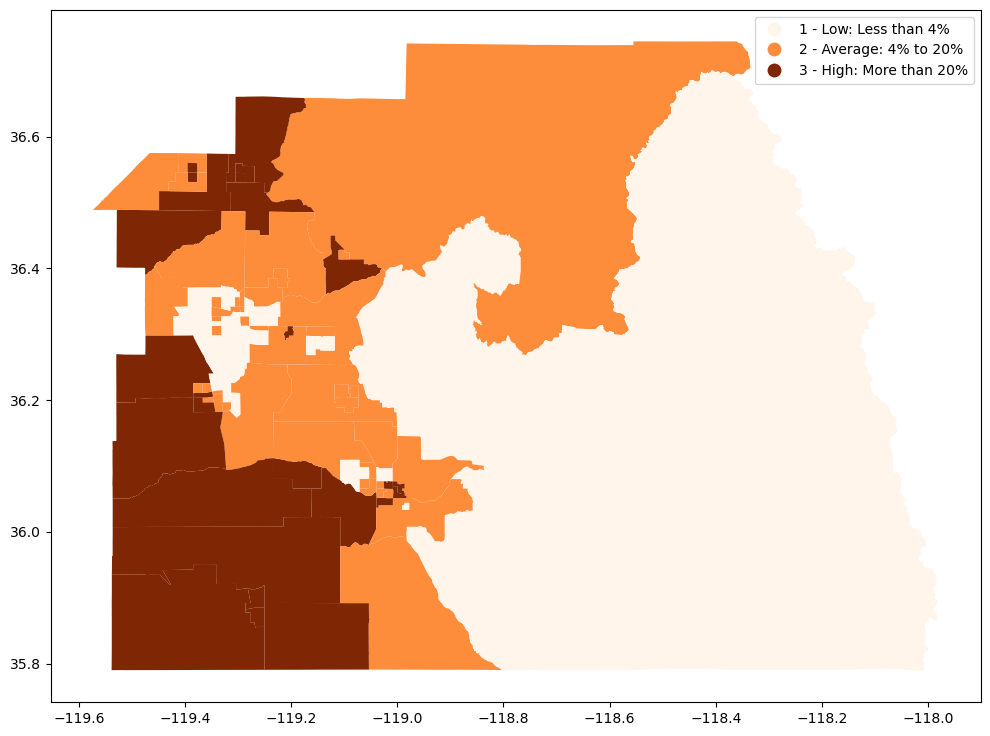

In [36]:
## Mapping % of residents w/i census tracts working in ag and land management in Tulare County
tulare_occ_tracts.plot(figsize=(12,10),
                 column='AgLand Labor Prop',
                 legend=True, 
                 cmap='Oranges')

Now, I'll map the proportion of the labor force that consists of professional workers in each census tract.

In [37]:
## Creating 'Proportion of Labor Force' variable to make legend more intuitive

## Range % of 'Professional' workers per census tract
print(tulare_occ_tracts['Professional and Related'].min())
print(tulare_occ_tracts['Professional and Related'].max())

0.0
51.92


In [38]:
## Identifying % values for 25% and 75% quartiles
tulare_occ_tracts['Professional and Related'].quantile([0.25,0.5,0.75])

0.25     7.57
0.50    13.83
0.75    21.25
Name: Professional and Related, dtype: float64

In [39]:
## Creating 'Proportion of Labor Force' variable for professional workers
tulare_occ_tracts['Prof Labor Prop'] = '3 - High: More than 21%'
tulare_occ_tracts.loc[tulare_occ_tracts['Professional and Related'] < 21, 'Prof Labor Prop'] = '2 - Average: 8% to 21%'
tulare_occ_tracts.loc[tulare_occ_tracts['Professional and Related'] < 8, 'Prof Labor Prop'] = '1 - Low: Less than 8%'
tulare_occ_tracts['Prof Labor Prop'].sample(5)

46    3 - High: More than 21%
55      1 - Low: Less than 8%
80      1 - Low: Less than 8%
79     2 - Average: 8% to 21%
87     2 - Average: 8% to 21%
Name: Prof Labor Prop, dtype: object

<AxesSubplot: >

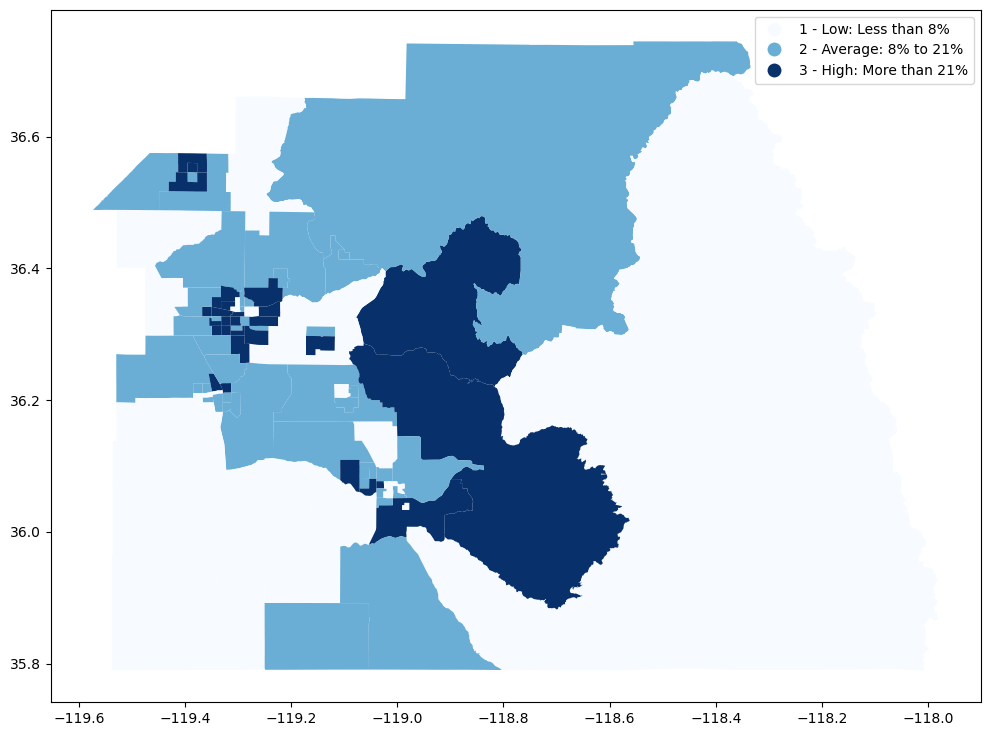

In [40]:
## Mapping % of residents w/i census tracts working in professional jobs in Tulare County
tulare_occ_tracts.plot(figsize=(12,10),
                 column='Prof Labor Prop',
                 legend=True, 
                 cmap='Blues')

It still looks like the the census tracts in Tulare County are stratified by occupation. The maps indicate that the tracts that have a higher number of professional workers seem to have a lower number of agricultural and resource management workers.

It will be interesting to see what kind of story this information will reveal once it's paired with data on (1) the location of oil wells in the County, (2) income distributions by census tract, and (3) health outcomes by census tracts.

## Exploring Incidence of Low Birth Weight in Kern County

### Getting Kern County FIPS Codes

Similarly, I was unable to find premade Kern County census tract shapefile/geojson, so I'm importing Census Data from Censusreporter.org and extracting information from it to create a FIPS variable in what will eventually be a shapefile for Kern County census tracts.

In [41]:
## Opening Kern County disability census data from Census Reporter
kern_tracts = gpd.read_file('acs2021_5yr_B99181_disability_kern.geojson')

In [42]:
kern_tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             237 non-null    object  
 1   name              237 non-null    object  
 2   B99181001         237 non-null    float64 
 3   B99181001, Error  237 non-null    float64 
 4   B99181002         237 non-null    float64 
 5   B99181002, Error  237 non-null    float64 
 6   B99181003         237 non-null    float64 
 7   B99181003, Error  237 non-null    float64 
 8   geometry          237 non-null    geometry
dtypes: float64(6), geometry(1), object(2)
memory usage: 16.8+ KB


In [43]:
kern_tracts.head()

geoid                         name  B99181001  \
0        05000US06029              Kern County, CA   877629.0   
1  14000US06029000102  Census Tract 1.02, Kern, CA     2965.0   
2  14000US06029000103  Census Tract 1.03, Kern, CA     5218.0   
3  14000US06029000104  Census Tract 1.04, Kern, CA     1241.0   
4  14000US06029000105  Census Tract 1.05, Kern, CA     3979.0   

   B99181001, Error  B99181002  B99181002, Error  B99181003  B99181003, Error  \
0              -1.0    90838.0              -1.0   786791.0              -1.0   
1              -1.0      377.0              -1.0     2588.0              -1.0   
2              -1.0      344.0              -1.0     4874.0              -1.0   
3              -1.0      171.0              -1.0     1070.0              -1.0   
4              -1.0      584.0              -1.0     3395.0              -1.0   

                                            geometry  
0  MULTIPOLYGON (((-119.91366 35.43926, -119.9232...  
1  MULTIPOLYGON (((-119.02148 35.43994, -119.0202...  
2  MULTIPOLYGON (((-119.03902 35.42290, -119.0389...  
3  MULTIPOLYGON (((-119.03879 35.44175, -119.0387...  
4  MULTIPOLYGON (((-119.03904 35.43414, -119.0365...

In [44]:
## Creating Kern FIPS variable from Census Reporter geojson

## Trimming disability dataset from Census Reporter
kern_tracts = kern_tracts[['geoid','geometry']].copy()
kern_tracts

geoid                                           geometry
0          05000US06029  MULTIPOLYGON (((-119.91366 35.43926, -119.9232...
1    14000US06029000102  MULTIPOLYGON (((-119.02148 35.43994, -119.0202...
2    14000US06029000103  MULTIPOLYGON (((-119.03902 35.42290, -119.0389...
3    14000US06029000104  MULTIPOLYGON (((-119.03879 35.44175, -119.0387...
4    14000US06029000105  MULTIPOLYGON (((-119.03904 35.43414, -119.0365...
..                  ...                                                ...
232  14000US06029006404  MULTIPOLYGON (((-118.93218 35.23783, -118.9321...
233  14000US06029006405  MULTIPOLYGON (((-118.93211 35.27421, -118.9321...
234  14000US06029006406  MULTIPOLYGON (((-118.91441 35.25257, -118.9144...
235  14000US06029006500  MULTIPOLYGON (((-118.30742 34.97458, -118.3069...
236  14000US06029006600  MULTIPOLYGON (((-119.64703 35.49928, -119.6469...

[237 rows x 2 columns]

In [45]:
## Creating a 'FIPS' variable using the 'geoid' variable
kern_tracts['FIPS'] = kern_tracts['geoid']

In [46]:
kern_tracts['FIPS'].head()

0          05000US06029
1    14000US06029000102
2    14000US06029000103
3    14000US06029000104
4    14000US06029000105
Name: FIPS, dtype: object

In [47]:
## Isolating the rows with census tracts only (removing the row with the County)
kern_tracts = kern_tracts.loc[1:236].copy()
kern_tracts

geoid                                           geometry  \
1    14000US06029000102  MULTIPOLYGON (((-119.02148 35.43994, -119.0202...   
2    14000US06029000103  MULTIPOLYGON (((-119.03902 35.42290, -119.0389...   
3    14000US06029000104  MULTIPOLYGON (((-119.03879 35.44175, -119.0387...   
4    14000US06029000105  MULTIPOLYGON (((-119.03904 35.43414, -119.0365...   
5    14000US06029000106  MULTIPOLYGON (((-119.08437 35.44132, -119.0838...   
..                  ...                                                ...   
232  14000US06029006404  MULTIPOLYGON (((-118.93218 35.23783, -118.9321...   
233  14000US06029006405  MULTIPOLYGON (((-118.93211 35.27421, -118.9321...   
234  14000US06029006406  MULTIPOLYGON (((-118.91441 35.25257, -118.9144...   
235  14000US06029006500  MULTIPOLYGON (((-118.30742 34.97458, -118.3069...   
236  14000US06029006600  MULTIPOLYGON (((-119.64703 35.49928, -119.6469...   

                   FIPS  
1    14000US06029000102  
2    14000US06029000103  
3    14000US06029000104  
4    14000US06029000105  
5    14000US06029000106  
..                  ...  
232  14000US06029006404  
233  14000US06029006405  
234  14000US06029006406  
235  14000US06029006500  
236  14000US06029006600  

[236 rows x 3 columns]

In [48]:
## Removing the extra characters in the values for the new FIPS column
kern_tracts['FIPS'] = '0'+kern_tracts['FIPS'].str.lstrip('14000US')
kern_tracts['FIPS'].copy()

1      06029000102
2      06029000103
3      06029000104
4      06029000105
5      06029000106
          ...     
232    06029006404
233    06029006405
234    06029006406
235    06029006500
236    06029006600
Name: FIPS, Length: 236, dtype: object

In [49]:
kern_tracts.head()

geoid                                           geometry  \
1  14000US06029000102  MULTIPOLYGON (((-119.02148 35.43994, -119.0202...   
2  14000US06029000103  MULTIPOLYGON (((-119.03902 35.42290, -119.0389...   
3  14000US06029000104  MULTIPOLYGON (((-119.03879 35.44175, -119.0387...   
4  14000US06029000105  MULTIPOLYGON (((-119.03904 35.43414, -119.0365...   
5  14000US06029000106  MULTIPOLYGON (((-119.08437 35.44132, -119.0838...   

          FIPS  
1  06029000102  
2  06029000103  
3  06029000104  
4  06029000105  
5  06029000106

### Now I can start examining incidence of low birth weight data.

There are a number of well-documented negative health effects of living near oil wells including asthma, higher incidences of lower birth weight, and potential impacts on fertility. I will be exploring low birth weight using data from CalEnviroScreen 4.0. 

In [50]:
## Opening CalEnviroScreen 4.0 data downloaded from the CalEnviroScreen website
CESdata = gpd.read_file('calenviroscreen40shpf2021shp.zip')

In [51]:
CESdata.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 67 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Tract       8035 non-null   float64 
 1   ZIP         8035 non-null   int64   
 2   County      8035 non-null   object  
 3   ApproxLoc   8035 non-null   object  
 4   TotPop19    8035 non-null   int64   
 5   CIscore     8035 non-null   float64 
 6   CIscoreP    8035 non-null   float64 
 7   Ozone       8035 non-null   float64 
 8   OzoneP      8035 non-null   float64 
 9   PM2_5       8035 non-null   float64 
 10  PM2_5_P     8035 non-null   float64 
 11  DieselPM    8035 non-null   float64 
 12  DieselPM_P  8035 non-null   float64 
 13  Pesticide   8035 non-null   float64 
 14  PesticideP  8035 non-null   float64 
 15  Tox_Rel     8035 non-null   float64 
 16  Tox_Rel_P   8035 non-null   float64 
 17  Traffic     8035 non-null   float64 
 18  TrafficP    8035 non-null   float64 
 19

In [52]:
## Converting'Tract' into a workable value
## Attempting to convert 'Tract' column from scientific notation into string values
CESdata= gpd.read_file('calenviroscreen40shpf2021shp.zip',
    dtype=
    {
        'Tract':str
    }
)
CESdata['Tract'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8035 entries, 0 to 8034
Series name: Tract
Non-Null Count  Dtype  
--------------  -----  
8035 non-null   float64
dtypes: float64(1)
memory usage: 62.9 KB


In [53]:
## Trimming for variabls of interest
health = CESdata[['geometry', 'Tract', 'County','GWThreat','GWThreatP','DrinkWat','DrinkWatP','HazWaste', 'HazWasteP', 'Tox_Rel','Tox_Rel_P','LowBirtWt', 'LowBirWP','ImpWatBod','ImpWatBodP']].copy()
health.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geometry    8035 non-null   geometry
 1   Tract       8035 non-null   float64 
 2   County      8035 non-null   object  
 3   GWThreat    8035 non-null   float64 
 4   GWThreatP   8035 non-null   float64 
 5   DrinkWat    8035 non-null   float64 
 6   DrinkWatP   8035 non-null   float64 
 7   HazWaste    8035 non-null   float64 
 8   HazWasteP   8035 non-null   float64 
 9   Tox_Rel     8035 non-null   float64 
 10  Tox_Rel_P   8035 non-null   float64 
 11  LowBirtWt   8035 non-null   float64 
 12  LowBirWP    8035 non-null   float64 
 13  ImpWatBod   8035 non-null   float64 
 14  ImpWatBodP  8035 non-null   float64 
dtypes: float64(13), geometry(1), object(1)
memory usage: 941.7+ KB


In [54]:
health.tail()

geometry         Tract  \
8030  POLYGON ((185152.883 -426843.064, 185240.372 -...  6.037430e+09   
8031  POLYGON ((179874.001 -429709.190, 179885.911 -...  6.037431e+09   
8032  POLYGON ((184530.475 -428031.241, 184535.255 -...  6.037431e+09   
8033  POLYGON ((167498.880 -447404.351, 167453.159 -...  6.037534e+09   
8034  POLYGON ((169695.249 -447290.043, 169560.378 -...  6.037534e+09   

           County  GWThreat  GWThreatP    DrinkWat  DrinkWatP  HazWaste  \
8030  Los Angeles      1.80  11.306658  570.821422  66.866492     0.320   
8031  Los Angeles      5.00  30.881620  667.697977  73.148495     0.150   
8032  Los Angeles     36.75  84.144114  497.755168  60.334707     1.885   
8033  Los Angeles     17.05  63.423543  639.063228  71.362558     0.375   
8034  Los Angeles     15.00  59.604848  514.160710  61.833396     1.110   

      HazWasteP      Tox_Rel  Tox_Rel_P  LowBirtWt   LowBirWP  ImpWatBod  \
8030  52.640635  1235.359019  69.217304       2.72   6.209905        3.0   
8031  26.671079  1324.936991  70.430108       3.48  15.871183        0.0   
8032  92.150893  1575.716309  74.356089       3.91  24.570182        2.0   
8033  58.808736  4435.870077  91.047762       5.87  72.478830        7.0   
8034  86.604897  4409.633464  90.897724       2.87   7.775212        7.0   

      ImpWatBodP  
8030   33.158337  
8031    0.000000  
8032   23.876522  
8033   66.736665  
8034   66.736665

In [55]:
health['Tract'].value_counts()

6.083002e+09    1
6.047001e+09    1
6.075020e+09    1
6.087121e+09    1
6.087120e+09    1
               ..
6.073020e+09    1
6.073021e+09    1
6.073022e+09    1
6.073008e+09    1
6.037534e+09    1
Name: Tract, Length: 8035, dtype: int64

In [56]:
health.columns

Index(['geometry', 'Tract', 'County', 'GWThreat', 'GWThreatP', 'DrinkWat',
       'DrinkWatP', 'HazWaste', 'HazWasteP', 'Tox_Rel', 'Tox_Rel_P',
       'LowBirtWt', 'LowBirWP', 'ImpWatBod', 'ImpWatBodP'],
      dtype='object')

In [57]:
## Trimming to only include census tracts in Kern County
health_Kern = health[health.County == 'Kern'].copy()
health_Kern.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 151 entries, 1402 to 1552
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geometry    151 non-null    geometry
 1   Tract       151 non-null    float64 
 2   County      151 non-null    object  
 3   GWThreat    151 non-null    float64 
 4   GWThreatP   151 non-null    float64 
 5   DrinkWat    151 non-null    float64 
 6   DrinkWatP   151 non-null    float64 
 7   HazWaste    151 non-null    float64 
 8   HazWasteP   151 non-null    float64 
 9   Tox_Rel     151 non-null    float64 
 10  Tox_Rel_P   151 non-null    float64 
 11  LowBirtWt   151 non-null    float64 
 12  LowBirWP    151 non-null    float64 
 13  ImpWatBod   151 non-null    float64 
 14  ImpWatBodP  151 non-null    float64 
dtypes: float64(13), geometry(1), object(1)
memory usage: 18.9+ KB


In [58]:
## Exploring low birth weight data

## Identifying % values for 25% and 75% quartiles
health_Kern['LowBirtWt'].quantile([0.25,0.5,0.75])

0.25    4.175
0.50    5.380
0.75    6.390
Name: LowBirtWt, dtype: float64

In [59]:
print(health_Kern['LowBirtWt'].min())
print(health_Kern['LowBirtWt'].max())

-999.0
9.35


In [60]:
## Seems like there are some missing values
## finding missing values across columns
print(health_Kern['LowBirtWt'].value_counts()[-999.0]) ## 5 values to note for later

5


In [61]:
## Creating variable to qualitatively scale birth weight frequencies
health_Kern['LowBirthWeightScale'] = ''

In [62]:
health_Kern['LowBirthWeightScale'] = '3: High - More than 6.4% of live births'
health_Kern.loc[health_Kern['LowBirtWt'] <6.4, 'LowBirthWeightScale'] = '2: Moderate - 4.2% to 6.4% of live births'
health_Kern.loc[health_Kern['LowBirtWt'] <4.2, 'LowBirthWeightScale'] = '1: Low - Less than 4.2% of live births'
health_Kern['LowBirthWeightScale'].sample(5)

1530      3: High - More than 6.4% of live births
1444    2: Moderate - 4.2% to 6.4% of live births
1453      3: High - More than 6.4% of live births
1434       1: Low - Less than 4.2% of live births
1504    2: Moderate - 4.2% to 6.4% of live births
Name: LowBirthWeightScale, dtype: object

Note: The scale is based on the values within the county, but it needs to be compare against the national and state average values.

<AxesSubplot: >

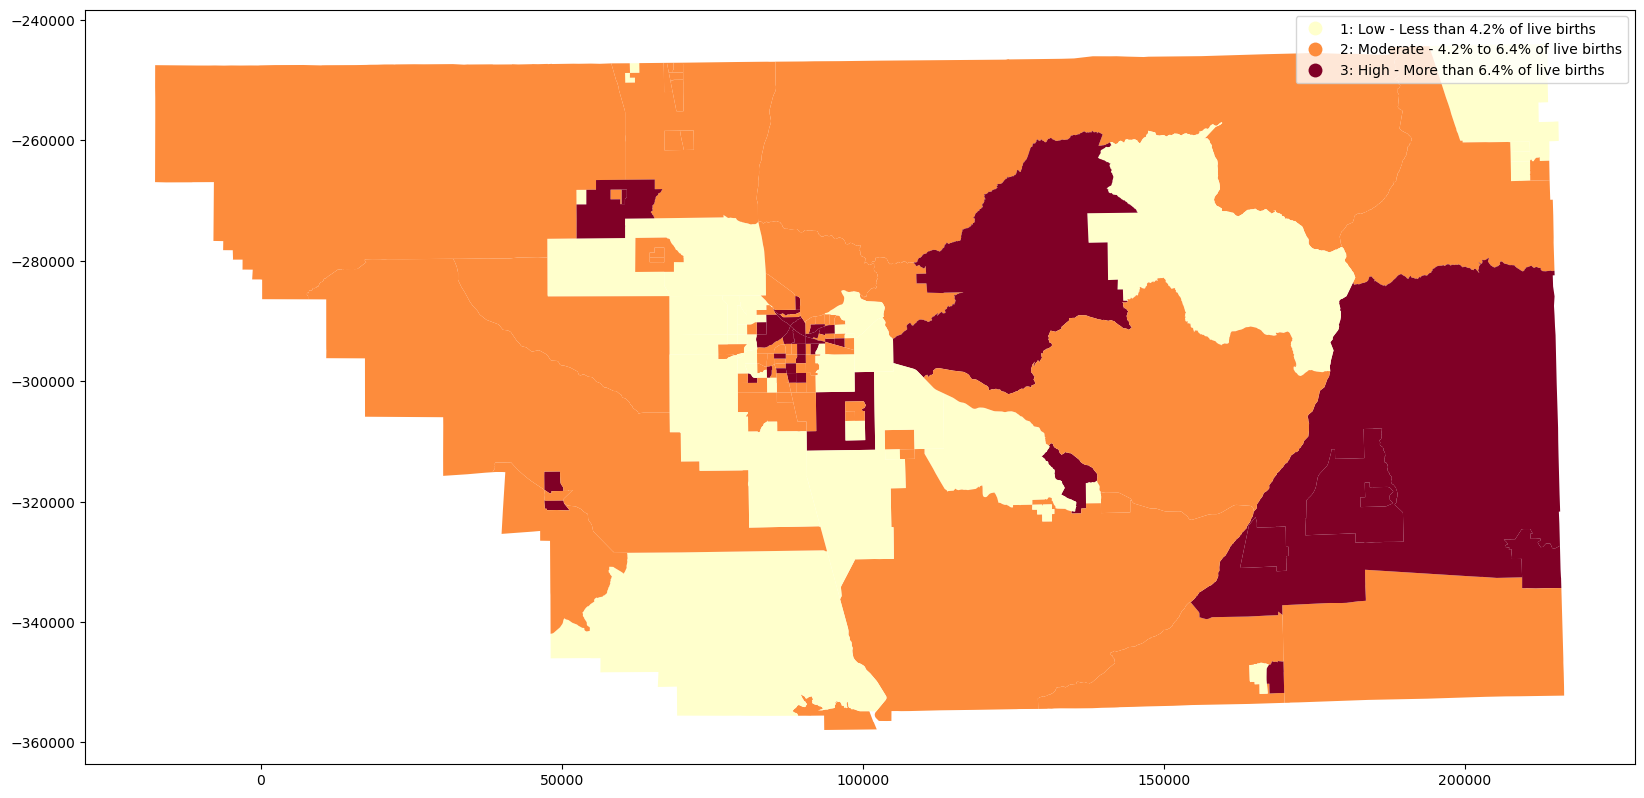

In [63]:
## Customizing map to visually optimize birth weight gradient 
## using color schemes available in Colormap
health_Kern.plot(
    figsize = (20,12),
    column = 'LowBirthWeightScale',
    cmap = 'YlOrRd',
    legend = True,
    legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            })

High incidence of low birthweight seems to be concentrated both in the choropleth mapsmiddle and eastern areas of Kern County (where infants with low birthweight account for more than 6.4% of all live births). For some context, in 2021, infants with low birth weight accounted for 7.3% of live births in California. [(Source)](https://www.marchofdimes.org/peristats/data?reg=99&top=4&stop=43&lev=1&slev=4&obj=18&sreg=06)

## Mapping Occupation Distributions in Kern County

Here, I'll be creating the same choropleth maps showing agricultural and land worker and professional workers as a proportion of the labor force in a census tract for Kern County.

But as with Tulare County, I need to merge the Social Explorer data with the Census Reporter data with geometry data using a shared FIPS column that I will need to create.

In [64]:
## Loading occupation data for Kern from Social Explorer
occ_kern = pd.read_csv('R13290813_SL140_kern.csv')
occ_kern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 82 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           236 non-null    int64  
 1   Geo_QName          236 non-null    object 
 2   Geo_FILEID         236 non-null    object 
 3   Geo_STUSAB         236 non-null    object 
 4   Geo_SUMLEV         236 non-null    int64  
 5   Geo_GEOCOMP        236 non-null    int64  
 6   Geo_LOGRECNO       236 non-null    int64  
 7   Geo_US             0 non-null      float64
 8   Geo_REGION         0 non-null      float64
 9   Geo_DIVISION       0 non-null      float64
 10  Geo_STATECE        0 non-null      float64
 11  Geo_STATE          236 non-null    int64  
 12  Geo_COUNTY         236 non-null    int64  
 13  Geo_COUSUB         0 non-null      float64
 14  Geo_PLACE          0 non-null      float64
 15  Geo_TRACT          236 non-null    int64  
 16  Geo_BLKGRP         0 non-n

In [65]:
occ_kern.head()

Geo_FIPS                                   Geo_QName Geo_FILEID  \
0  6029000102  Census Tract 1.02, Kern County, California      ACSSF   
1  6029000103  Census Tract 1.03, Kern County, California      ACSSF   
2  6029000104  Census Tract 1.04, Kern County, California      ACSSF   
3  6029000105  Census Tract 1.05, Kern County, California      ACSSF   
4  6029000106  Census Tract 1.06, Kern County, California      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  Geo_REGION  \
0         ca         140            0          3903     NaN         NaN   
1         ca         140            0          3904     NaN         NaN   
2         ca         140            0          3905     NaN         NaN   
3         ca         140            0          3906     NaN         NaN   
4         ca         140            0          3907     NaN         NaN   

   Geo_DIVISION  ...  PCT_SE_B17008_005  PCT_SE_B17008_006  PCT_SE_B17008_007  \
0           NaN  ...               4.35               4.18               1.07   
1           NaN  ...               6.29               4.39               0.00   
2           NaN  ...               0.00              12.21              10.94   
3           NaN  ...               3.69               2.87               3.63   
4           NaN  ...               0.00               3.54               0.00   

   PCT_SE_B17008_008  PCT_SE_B17008_009  PCT_SE_B17008_010  PCT_SE_B17008_011  \
0               4.59              11.98              16.65               0.66   
1               6.08              11.00              14.49               2.38   
2               0.00               0.00              17.56               0.00   
3               2.01               2.17              14.20               0.00   
4               0.00               4.41              36.22               4.65   

   PCT_SE_B17008_012  PCT_SE_B17008_013  PCT_SE_B17008_014  
0              12.22               2.95               7.47  
1              26.81               0.00              10.47  
2              44.53               2.80               5.09  
3              19.46               8.46               7.37  
4               9.92               0.16              10.71  

[5 rows x 82 columns]

In [66]:
## Recoding FIPS/Geo ID columns as strings
occ_kern = pd.read_csv('R13290813_SL140_kern.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_COUNTY':str,
        'Geo_STATE':str
    }
)

In [67]:
## Confirming change in datatype
occ_kern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 82 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           236 non-null    object 
 1   Geo_QName          236 non-null    object 
 2   Geo_FILEID         236 non-null    object 
 3   Geo_STUSAB         236 non-null    object 
 4   Geo_SUMLEV         236 non-null    int64  
 5   Geo_GEOCOMP        236 non-null    int64  
 6   Geo_LOGRECNO       236 non-null    int64  
 7   Geo_US             0 non-null      float64
 8   Geo_REGION         0 non-null      float64
 9   Geo_DIVISION       0 non-null      float64
 10  Geo_STATECE        0 non-null      float64
 11  Geo_STATE          236 non-null    object 
 12  Geo_COUNTY         236 non-null    object 
 13  Geo_COUSUB         0 non-null      float64
 14  Geo_PLACE          0 non-null      float64
 15  Geo_TRACT          236 non-null    int64  
 16  Geo_BLKGRP         0 non-n

In [68]:
## Trimming the dataset for essential columns (this time for the % variables)
occupations_kern = ['Geo_FIPS','SE_B17008_001','PCT_SE_B17008_002','PCT_SE_B17008_003','PCT_SE_B17008_004','PCT_SE_B17008_005','PCT_SE_B17008_006','PCT_SE_B17008_007','PCT_SE_B17008_008','PCT_SE_B17008_009','PCT_SE_B17008_010','PCT_SE_B17008_011','PCT_SE_B17008_012','PCT_SE_B17008_013','PCT_SE_B17008_014']
occ_kern = occ_kern[occupations_kern]

In [69]:
## Renaming the columns
occ_kern.columns = ['FIPS','EmployedPop','Management, Business, and Financial Ops','Professional and Related','Healthcare Support','Protective Service','Food Preparation and Serving Related','Building and Grounds Cleaning and Maintenance','Personal Care and Service','Sales and Related','Office and Administrative Support','Farming, Fishing, and Forestry','Construction, Extraction, and Maintenance','Production','Transportation and Material Moving']
occ_kern.head()

FIPS  EmployedPop  Management, Business, and Financial Ops  \
0  06029000102         1219                                    17.64   
1  06029000103         1891                                     6.45   
2  06029000104          393                                     0.00   
3  06029000105         1845                                    13.93   
4  06029000106         1270                                     9.45   

   Professional and Related  Healthcare Support  Protective Service  \
0                     15.50                0.74                4.35   
1                     11.63                0.00                6.29   
2                      0.00                6.87                0.00   
3                     22.22                0.00                3.69   
4                     20.94                0.00                0.00   

   Food Preparation and Serving Related  \
0                                  4.18   
1                                  4.39   
2                                 12.21   
3                                  2.87   
4                                  3.54   

   Building and Grounds Cleaning and Maintenance  Personal Care and Service  \
0                                           1.07                       4.59   
1                                           0.00                       6.08   
2                                          10.94                       0.00   
3                                           3.63                       2.01   
4                                           0.00                       0.00   

   Sales and Related  Office and Administrative Support  \
0              11.98                              16.65   
1              11.00                              14.49   
2               0.00                              17.56   
3               2.17                              14.20   
4               4.41                              36.22   

   Farming, Fishing, and Forestry  Construction, Extraction, and Maintenance  \
0                            0.66                                      12.22   
1                            2.38                                      26.81   
2                            0.00                                      44.53   
3                            0.00                                      19.46   
4                            4.65                                       9.92   

   Production  Transportation and Material Moving  
0        2.95                                7.47  
1        0.00                               10.47  
2        2.80                                5.09  
3        8.46                                7.37  
4        0.16                               10.71

In [70]:
occ_kern.columns.to_list()

['FIPS',
 'EmployedPop',
 'Management, Business, and Financial Ops',
 'Professional and Related',
 'Healthcare Support',
 'Protective Service',
 'Food Preparation and Serving Related',
 'Building and Grounds Cleaning and Maintenance',
 'Personal Care and Service',
 'Sales and Related',
 'Office and Administrative Support',
 'Farming, Fishing, and Forestry',
 'Construction, Extraction, and Maintenance',
 'Production',
 'Transportation and Material Moving']

In [71]:
## Average number of workers per census tract in Kern County
print(occ_kern['EmployedPop'].mean())
print(occ_kern['EmployedPop'].median())

1498.4618644067796
1397.5


In [72]:
## Average % of Ag and land workers per census tract in Kern County
print(occ_kern['Farming, Fishing, and Forestry'].mean())
print(occ_kern['Farming, Fishing, and Forestry'].median())
## interesting how far apart the mean and median values are -- suggests huge stratification?

9.159224137931032
2.2199999999999998


In [73]:
## Average % of 'Construction, Extraction, and Maintenance' workers per census tract in Kern County
print(occ_kern['Construction, Extraction, and Maintenance'].mean())
print(occ_kern['Construction, Extraction, and Maintenance'].median())

10.721810344827587
9.43


In [74]:
## Average % of 'Construction, Extraction, and Maintenance' workers per census tract in Kern County
print(occ_kern['Professional and Related'].mean())
print(occ_kern['Professional and Related'].median())

17.877715517241384
15.559999999999999


It looks like professional workers make up the largest proportion of the workforce by census tract in Kern County. While workers in the extraction industries make up a smaller proportion, and the proportion of agricultural and land workers of the labor force might vary widely. It will be easier to identify these distributions visually on a map.

In [75]:
## Merging Kern County Census Tract geojson with cccupation data for Kern County
kern_occ_tracts = kern_tracts.merge(occ_kern,on="FIPS")
## Confirming that the data has been merged
kern_occ_tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 236 entries, 0 to 235
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   geoid                                          236 non-null    object  
 1   geometry                                       236 non-null    geometry
 2   FIPS                                           236 non-null    object  
 3   EmployedPop                                    236 non-null    int64   
 4   Management, Business, and Financial Ops        232 non-null    float64 
 5   Professional and Related                       232 non-null    float64 
 6   Healthcare Support                             232 non-null    float64 
 7   Protective Service                             232 non-null    float64 
 8   Food Preparation and Serving Related           232 non-null    float64 
 9   Building and Grounds Cleaning and M

### Mapping Agricultural and Land Workers as Proportion of the Labor Force in Kern County

In [76]:
## Creating 'Proportion of Labor Force' variable to make legend more intuitive

## Range % of 'Farming, Fishing, and Forestry' workers per census tract
print(kern_occ_tracts['Farming, Fishing, and Forestry'].min())
print(kern_occ_tracts['Farming, Fishing, and Forestry'].max())

0.0
62.82


In [77]:
## Identifying % values for 25% and 75% quartiles
kern_occ_tracts['Farming, Fishing, and Forestry'].quantile([0.25,0.5,0.75])

0.25     0.000
0.50     2.220
0.75    14.135
Name: Farming, Fishing, and Forestry, dtype: float64

In [78]:
## Creating 'Proportion of Labor Force' variable for ag and land workers
## Using the same thresholds for Tulare County, so that they might be comparable
## May change % thresholds later 
kern_occ_tracts['AgLand Labor Prop'] = '3 - High: More than 20%'
kern_occ_tracts.loc[kern_occ_tracts['Farming, Fishing, and Forestry'] < 20, 'AgLand Labor Prop'] = '2 - Average: 4% to 20%'
kern_occ_tracts.loc[kern_occ_tracts['Farming, Fishing, and Forestry'] < 4, 'AgLand Labor Prop'] = '1 - Low: Less than 4%'
kern_occ_tracts['AgLand Labor Prop'].sample(5)

75       1 - Low: Less than 4%
92       1 - Low: Less than 4%
26       1 - Low: Less than 4%
6        1 - Low: Less than 4%
169    3 - High: More than 20%
Name: AgLand Labor Prop, dtype: object

<AxesSubplot: >

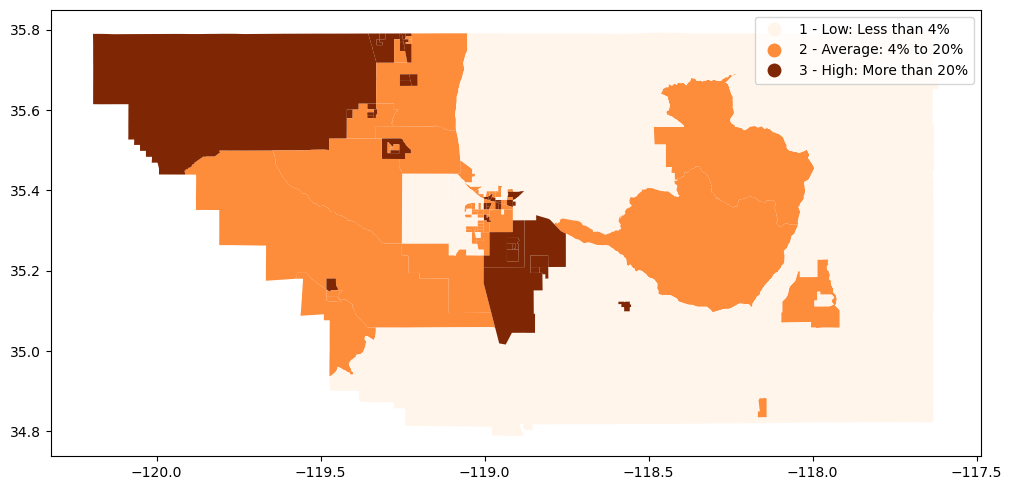

In [79]:
## Mapping % of residents w/i census tracts working in ag and land management in Kern County
kern_occ_tracts.plot(figsize=(12,10),
                 column='AgLand Labor Prop',
                 legend=True, 
                 cmap='Oranges')

It seems like most agricultural and land workers are concentrated in the western parts of the county, partcularly in the northwest.

### Mapping Professional Workers as Proportion of the Labor Force in Kern County

In [80]:
## Creating 'Proportion of Labor Force' variable to make legend more intuitive

## Range % of 'Professional and Related' workers per census tract
print(kern_occ_tracts['Professional and Related'].min())
print(kern_occ_tracts['Professional and Related'].max())

0.0
57.55


In [81]:
## Identifying % values for 25% and 75% quartiles
kern_occ_tracts['Professional and Related'].quantile([0.25,0.5,0.75])

0.25     9.135
0.50    15.560
0.75    25.200
Name: Professional and Related, dtype: float64

In [82]:
## Creating 'Proportion of Labor Force' variable for ag and land workers
## Using the same thresholds for Tulare County, so that they might be comparable
## May change % thresholds later 
kern_occ_tracts['Prof Labor Prop'] = '3 - High: More than 21%'
kern_occ_tracts.loc[kern_occ_tracts['Professional and Related'] < 21, 'Prof Labor Prop'] = '2 - Average: 8% to 21%'
kern_occ_tracts.loc[kern_occ_tracts['Professional and Related'] < 8, 'Prof Labor Prop'] = '1 - Low: Less than 8%'
kern_occ_tracts['Prof Labor Prop'].sample(5)

208    3 - High: More than 21%
22      2 - Average: 8% to 21%
188    3 - High: More than 21%
109    3 - High: More than 21%
88     3 - High: More than 21%
Name: Prof Labor Prop, dtype: object

<AxesSubplot: >

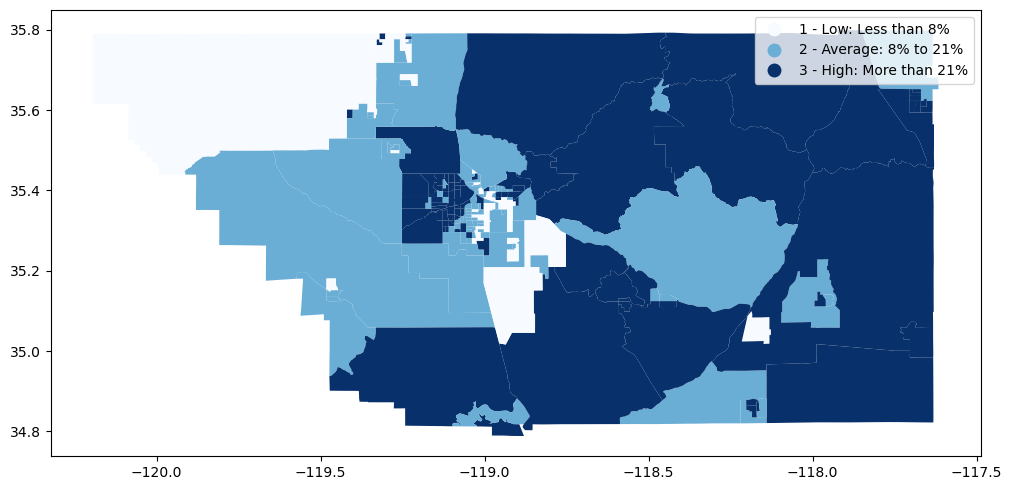

In [83]:
## Mapping % of residents w/i census tracts working in professional jobs in Kern County
kern_occ_tracts.plot(figsize=(12,10),
                 column='Prof Labor Prop',
                 legend=True, 
                 cmap='Blues')

Interestingly, the same pattern of "occupational segregation" between agricultural and land workers and professional workers observed in Tulare County seems to hold for Kern County. The highest concentration of professional workers in Kern County seem to be concentrated in the eastern and central areas.

Looking at the occupation and low birth weight maps, it seems that there is no clear relationship between likely occupational environmental risk exposures and rates of low birthweight. This could be attributed to two thing: (1) it is unclear whether residents within a census tract work within the same census tract or they commute to their places of work (which would mean that their "place of work" would be a more accurate indicator to use to guage environmental risk exposure) and (2) environmental risk exposure might just have a more direct relationship to other factors, like the location of oil and gas drilling operations in the County.

## Oil Wells and Low Birth Weight in Kern County

In [84]:
## importing more libraries
import folium

In [85]:
## loading base map (centering Kern County: 35.4937° N, 118.8597° W)
Kern_aglandlabor = folium.Map(location=[35.4,-118.8], 
               zoom_start = 8,
               tiles='CartoDB positron', 
               attribution='CartoDB')
Kern_aglandlabor

In [87]:
## Adding Kern County Census Tract layer
folium.GeoJson(kern_tracts, name="geojson").add_to(Kern_aglandlabor)
folium.LayerControl().add_to(Kern_aglandlabor)
Kern_aglandlabor

In [88]:
## Adding Agricultural and Land Workers as a Proportion of the Labor Force as layer

Kern_aglandlabor = folium.Map(location=[35.4,-118.8], 
               zoom_start = 8,
               tiles='CartoDB positron', 
               attribution='CartoDB')

folium.Choropleth(
                  geo_data=kern_occ_tracts, 
                  data=kern_occ_tracts,         
                  key_on='feature.properties.FIPS', 
                  columns=['FIPS', 'Farming, Fishing, and Forestry'], 
                  fill_color='Oranges',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, 
                  legend_name='Agricultural and Land Workers as a Proportion of the Labor Force (2021)').add_to(Kern_aglandlabor)
Kern_aglandlabor

## Preliminary Exploration of Oil Well in Kern County Data

** I tried adding the oil well data points to the interactive folium map but the dataset might just be too big (which makes sense since there are well over 150K wells in the data) and keeps causing my kernel to die. So leaving that off for next week and exploring oil well data independently in this section.

In [89]:
## Adding oil well locations to map

## Pulling raw Kern County oil well data from group repo
kern_wells = pd.read_csv('https://raw.githubusercontent.com/ybecerra29/up221groupproject/main/kern_county_oil.csv')

In [90]:
kern_wells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156313 entries, 0 to 156312
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   LeaseName   156313 non-null  object 
 1   WellDesign  156313 non-null  object 
 2   WellStatus  156313 non-null  object 
 3   WellType    156313 non-null  object 
 4   WellTypeLa  156313 non-null  object 
 5   OperatorNa  156313 non-null  object 
 6   Place       156313 non-null  object 
 7   CountyName  156313 non-null  object 
 8   Latitude    156313 non-null  float64
 9   Longitude   156313 non-null  float64
 10  GISSource   156313 non-null  object 
 11  isDirectio  156313 non-null  object 
 12  WellSymbol  156313 non-null  object 
dtypes: float64(2), object(11)
memory usage: 15.5+ MB


In [91]:
kern_wells.head()

LeaseName            WellDesign WellStatus WellType WellTypeLa  \
0  Southern Pacific  Southern Pacific 11H   Canceled       OG  Oil & Gas   
1           Siegfus        Siegfus 31X-22   Canceled       OG  Oil & Gas   
2  Southern Pacific   Southern Pacific 5H   Canceled       OG  Oil & Gas   
3  Southern Pacific   Southern Pacific 6H   Canceled       OG  Oil & Gas   
4  Southern Pacific   Southern Pacific 7H   Canceled       OG  Oil & Gas   

                                    OperatorNa        Place CountyName  \
0  California Resources Production Corporation  Kern County       Kern   
1  California Resources Production Corporation  Kern County       Kern   
2                    Stockdale Oil & Gas, Inc.  Kern County       Kern   
3                    Stockdale Oil & Gas, Inc.  Kern County       Kern   
4                    Stockdale Oil & Gas, Inc.  Kern County       Kern   

    Latitude   Longitude GISSource isDirectio  WellSymbol  
0  35.401291 -118.860405  Operator          N  CanceledOG  
1  35.397495 -118.855888  Operator          N  CanceledOG  
2  35.404583 -118.850471       mip          N  CanceledOG  
3  35.403610 -118.849937       mip          N  CanceledOG  
4  35.405106 -118.856483       mip          N  CanceledOG

In [92]:
## Examining the status of the wells in the County
## making a note of this for later/potentially color coding on a map
kern_wells['WellStatus'].value_counts()

Plugged        71548
Active         46049
Idle           27930
Canceled        8355
New             2251
PluggedOnly      147
Unknown           33
Name: WellStatus, dtype: int64

In [93]:
## Getting a sense of how many operators manage wells in the county and how many each
kern_wells['OperatorNa'].value_counts()

Aera Energy LLC                           50152
Chevron U.S.A. Inc.                       44266
California Resources Elk Hills, LLC       10476
Berry Petroleum Company, LLC               8323
Sentinel Peak Resources California LLC     7304
                                          ...  
Wm. M. Thornbury, Operator                    1
William F. Wrath                              1
R. G. Greene                                  1
Belmac Drilling Co.                           1
Investment Trends Corp.                       1
Name: OperatorNa, Length: 2398, dtype: int64

### Trying another way to just see the oil well locations on a map...

In [95]:
# importing libraries to give more power to my plots
import matplotlib.pyplot as plt
import contextily as ctx

In [96]:
kern_wells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156313 entries, 0 to 156312
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   LeaseName   156313 non-null  object 
 1   WellDesign  156313 non-null  object 
 2   WellStatus  156313 non-null  object 
 3   WellType    156313 non-null  object 
 4   WellTypeLa  156313 non-null  object 
 5   OperatorNa  156313 non-null  object 
 6   Place       156313 non-null  object 
 7   CountyName  156313 non-null  object 
 8   Latitude    156313 non-null  float64
 9   Longitude   156313 non-null  float64
 10  GISSource   156313 non-null  object 
 11  isDirectio  156313 non-null  object 
 12  WellSymbol  156313 non-null  object 
dtypes: float64(2), object(11)
memory usage: 15.5+ MB


In [97]:
## converting df into gdf
kern_wellsgeo = gpd.GeoDataFrame(kern_wells, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(kern_wells.Longitude, kern_wells.Latitude))

In [98]:
kern_wellsgeo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

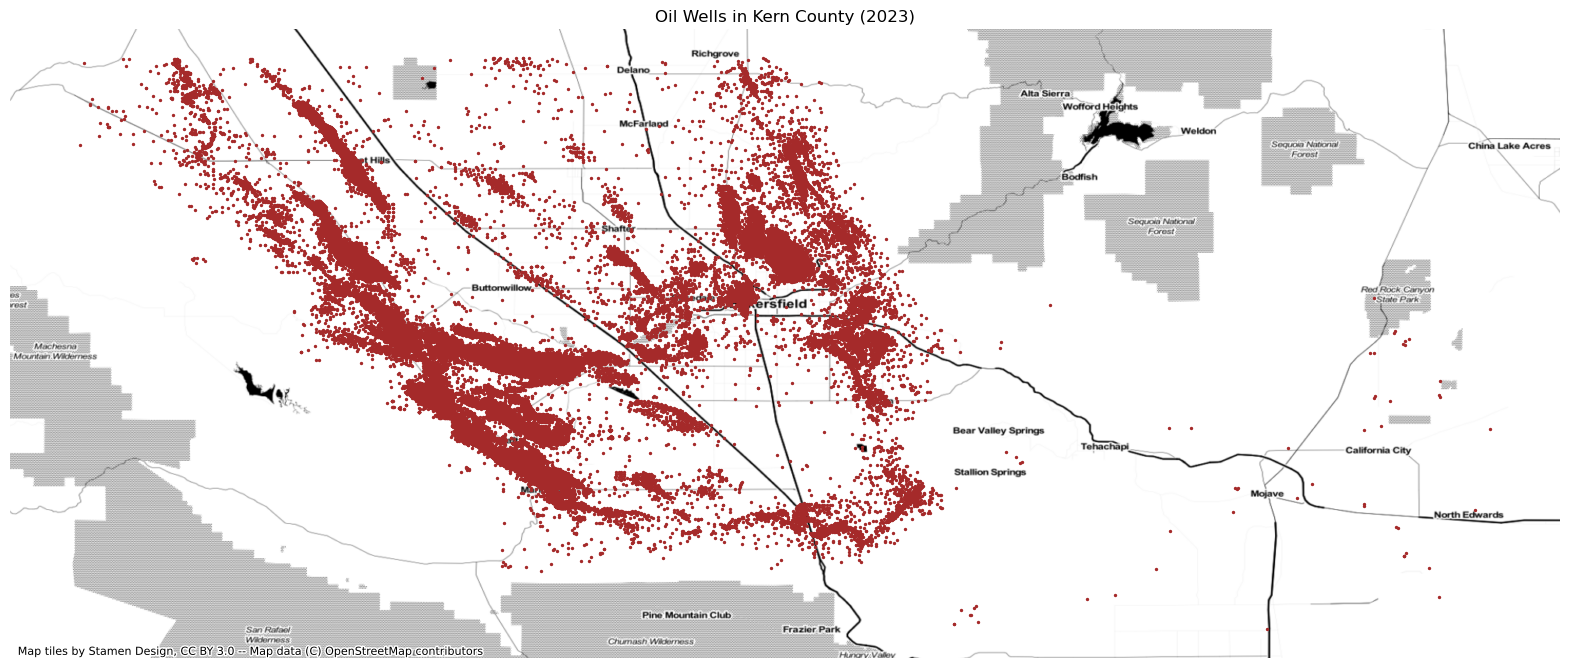

In [99]:
## plotting kern oil wells on map

fig, ax = plt.subplots(figsize=(20,12))

# add the data
kern_wellsgeo.plot(ax=ax, 
        marker='.',
        markersize=8,
        color='brown')

kern_tracts.plot(ax=ax,
        

# turning axes off
ax.axis('off')

# title
ax.set_title('Oil Wells in Kern County (2023)')

# basemap
ctx.add_basemap(ax, source=ctx.providers.Stamen.Toner, crs=4326)